In [1]:
# Importamos los distintos paquetes que vamos a utilizar
from sklearn_ubu.disturbing_neighbors import DisturbingNeighbors
from sklearn_ubu.disturbing_neighbors import BaseDisturbingNeighbors
from sklearn.datasets import make_multilabel_classification
from sklearn.metrics import hamming_loss
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import graphviz

In [6]:
# Creamos una semilla
seed = 0

# Creamos un conjunto de entrenamiento
X, y = make_multilabel_classification(
    n_samples=80, n_features=10, random_state=seed)

# Creamos nuestro clasificador BaseDisturbingNeighbors, al que le pasamos
# un clasificador y la semilla
dn = BaseDisturbingNeighbors(base_estimator=DecisionTreeClassifier(
        random_state=seed), random_state=seed)

# Usamos train_split para dividir nuestro conjunto en un conjunto de
# entrenamiento y otro de test
X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.5, train_size=0.5, random_state=seed)


In [7]:
# Entrenamos nuestro clasificador, en este caso un arbol
arbol = dn.fit(X_train, y_train)

# Predecimos nuestro clasificador
y_predict = dn.predict(X_test)

# Predecimos las probabilidades de nuestro clasificador
y_predict_proba = dn.predict_proba(X_test)

# Calculamos la distancia de hamming_loss
dist = hamming_loss(y_test, y_predict)
print(dist)


0.35


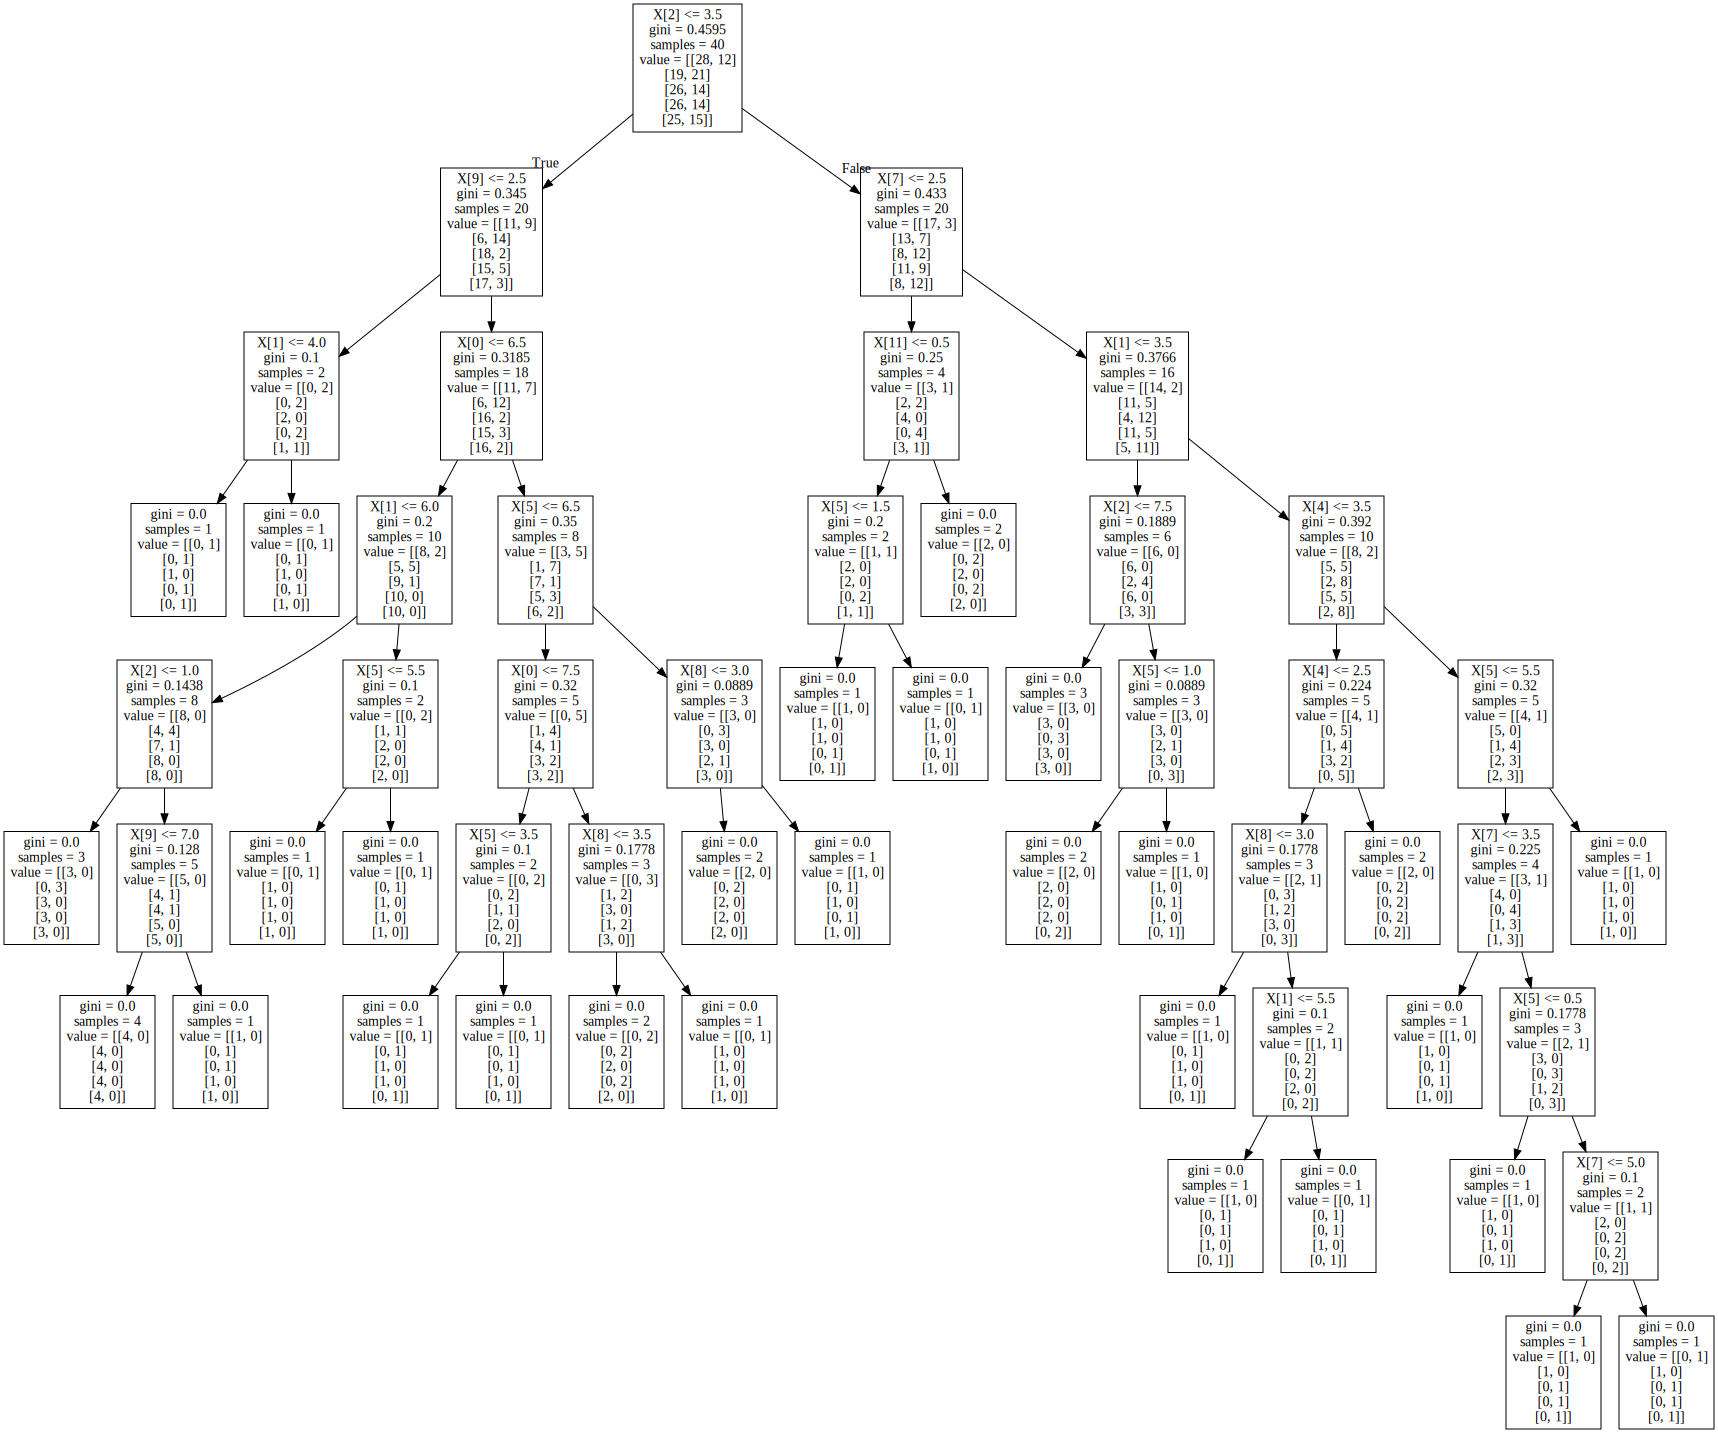

In [8]:
# Mostramos nuestro arbol creado
dot_data = export_graphviz(arbol, out_file=None)
graph = graphviz.Source(dot_data)
graph


In [9]:
# Hacemos validación cruzada
scores = cross_val_score(dn, X, y, cv=5)
print(scores)


[ 0.0625  0.25    0.125   0.      0.125 ]
